# hierarchical Clustering Unsupervised learning

In [ ]:
# generally used for small data set 
# u dont know the number of clusters 
# use dendogram for finding the value of k 

In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets

In [18]:
print(dir(datasets))


['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__getattr__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_arff_parser', '_base', '_california_housing', '_covtype', '_kddcup99', '_lfw', '_olivetti_faces', '_openml', '_rcv1', '_samples_generator', '_species_distributions', '_svmlight_format_fast', '_svmlight_format_io', '_twenty_newsgroups', 'clear_data_home', 'dump_svmlight_file', 'fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'get_data_home', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine', 'make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classification', 'make_friedman1', 'make_f

In [27]:
data=datasets.load_iris()

In [33]:
df=pd.DataFrame(data.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [49]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [51]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [69]:
df.columns=data.feature_names

In [70]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [75]:
df['target']=data.target

In [77]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [83]:
x=df.drop('target',axis='columns')
y=df.target

In [85]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [92]:
len(df)

150

In [96]:
len(x_train)

120

In [98]:
len(y_test)

30

# feature scaling 

In [124]:
df.drop('target',axis='columns',inplace=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# it is the last step in Feature engineering 
# why we need ?
# Scaling ensures all features contribute equally, improving accuracy and stability.


# Why Standardize Before Hierarchical Clustering?
# Imagine this:

# Feature A: "Age" (0–100)

# Feature B: "Income" (in 1000s)

# Without standardization, features with larger numeric ranges dominate the distance calculation,
# which can distort the clustering structure.

# ✔️ StandardScaler ensures:
# All features contribute equally to the distance calculation.

# Improves accuracy of clustering results.

In [130]:
# Step 1: Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [136]:
# Why PCA is Needed:
# To remove redundant features.

# To speed up training time.

# To visualize high-dimensional data in 2D or 3D.

# To reduce overfitting by eliminating less informative features.
# it converts 4 dimension data to 2 dimemsion data 

from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [138]:
pca

PCA(n_components=2)

In [140]:
pca_scaled=pca.fit_transform(scaled_data)

In [143]:
pca_scaled

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

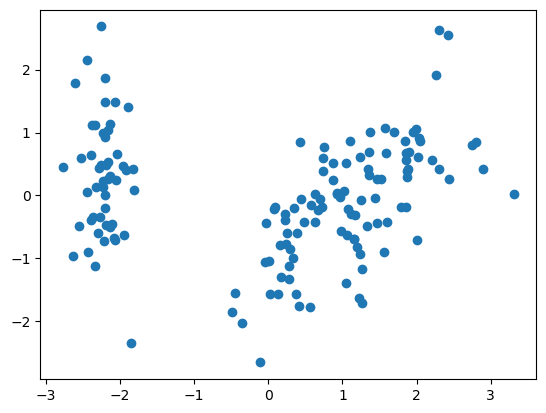

In [145]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])
# [:, 0]	Means "select all rows, column 0"
# [:, 1]	Means "select all rows, column 1"
# : means select all rows 

In [ ]:
# now create a dendogram to find the value of k

Text(0, 0.5, 'Eucledian Distance')

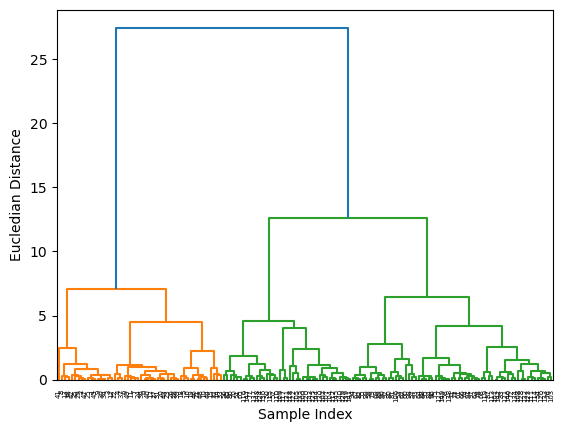

In [157]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(pca_scaled, method='ward'))
plt.xlabel("Sample Index")
plt.ylabel("Eucledian Distance")

In [ ]:
# Agglomerative Clustering is a bottom-up hierarchical clustering method that merges the 
# closest data points or clusters step-by-step until a desired structure is formed.

In [181]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = model.fit_predict(pca_scaled)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

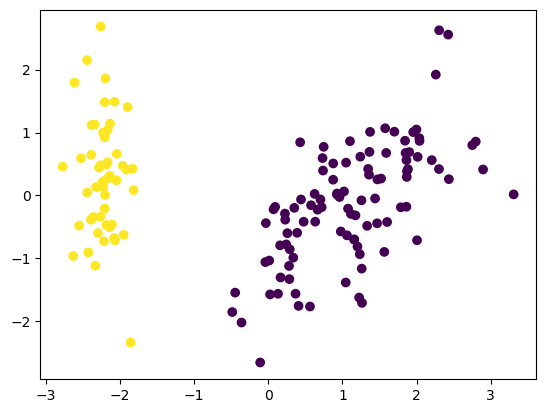

In [183]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=labels)


# Silhouette Score

In [ ]:
# # When to Use:
# To evaluate clustering results

# Score Range:

# -1  →  Bad clustering
#  0  →  Overlapping clusters
# +1  →  Well-separated clusters

# formula
# s(i) = (b(i) - a(i)) / max(a(i), b(i))


# Silhouette Score evaluates how well each point fits in its cluster, with values closer to 1 indicating better clustering.

In [196]:
from sklearn.metrics import silhouette_score

In [202]:
silhouette_coefficient=[]
for k in range(2,11):
    model = AgglomerativeClustering(n_clusters=2)
    labels = model.fit_predict(pca_scaled)
    score = silhouette_score(pca_scaled, labels)
    silhouette_coefficient.append(score)

([<matplotlib.axis.XTick at 0x23daa1d5e80>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

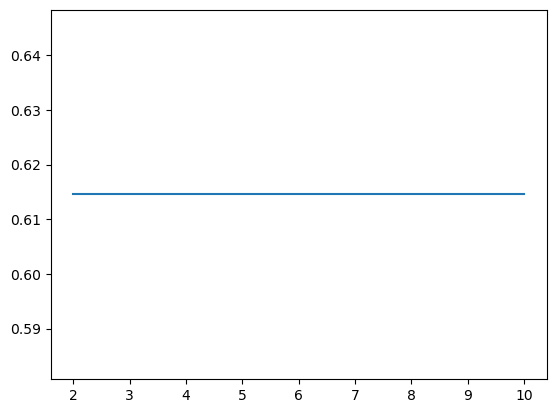

In [210]:
plt.plot(range(2, 11),silhouette_coefficient) 
plt.xticks(range(2,11))

In [217]:
score = silhouette_score(pca_scaled, labels)
score

0.6145202036230452